In [22]:
import os
import random

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import sklearn as skl

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import auc, roc_curve, plot_roc_curve, confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



In [23]:
!wget https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv

--2023-01-19 13:28:00--  https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘heart-disease.csv.1’

heart-disease.csv.1 100%[===================>]  11.06K  --.-KB/s    in 0s      

2023-01-19 13:28:00 (82.0 MB/s) - ‘heart-disease.csv.1’ saved [11328/11328]



In [24]:
data = pd.read_csv('heart-disease.csv')

In [25]:
data.shape

(303, 14)

In [26]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [28]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

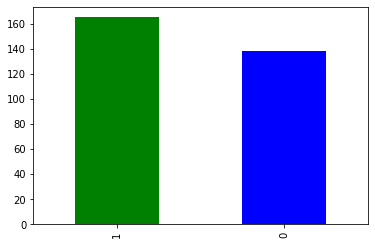

In [29]:
data['target'].value_counts().plot(kind = 'bar', color = ['green','blue'])

In [30]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [31]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [32]:
pd.crosstab(data['target'],data['sex'])

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

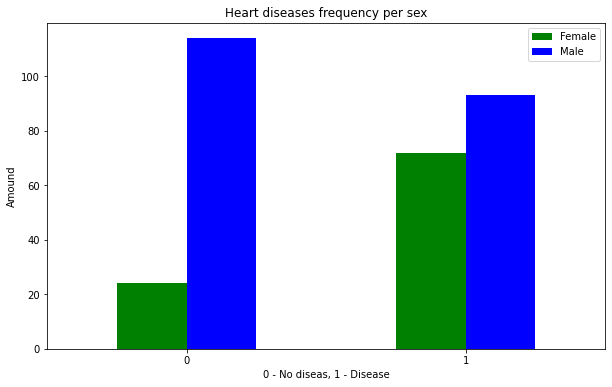

In [37]:
pd.crosstab(data['target'],data['sex']).plot(kind = 'bar',
                                             figsize = (10,6),
                                             color = ['green','blue'])

plt.title('Heart diseases frequency per sex')
plt.xlabel('0 - No diseas, 1 - Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation = 0)

Text(0.5, 1.0, 'Heart disease as a funcion of age and max heart rate')

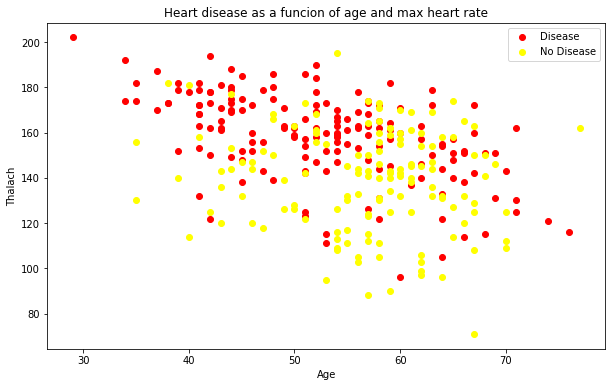

In [49]:
fig,axs =  plt.subplots(1,figsize = (10,6))

axs.scatter(data[data['target'] == 1]['age'],
            data[data['target'] == 1]['thalach'],
            c = 'red')

axs.scatter(data[data['target'] == 0]['age'],
            data[data['target'] == 0]['thalach'],
            c = 'yellow')


plt.xlabel('Age')
plt.ylabel('Thalach')
plt.legend(['Disease','No Disease'])
plt.title('Heart disease as a funcion of age and max heart rate')


Text(0.5, 1.0, 'Heart disease as a funcion of age and max heart rate')

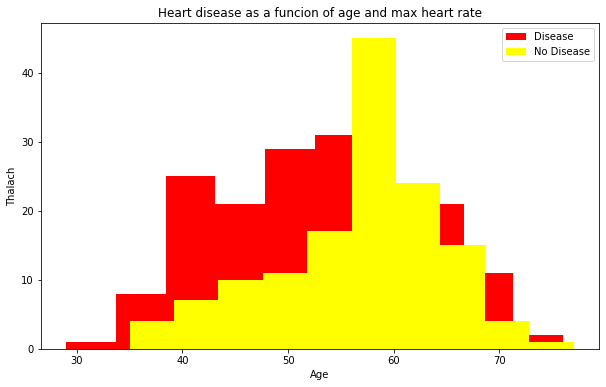

In [53]:
fig,axs =  plt.subplots(1,figsize = (10,6))

axs.hist(data[data['target'] == 1]['age'],color = 'red')
axs.hist(data[data['target'] == 0]['age'],color = 'yellow')



plt.xlabel('Age')
plt.ylabel('Thalach')
plt.legend(['Disease','No Disease'])
plt.title('Heart disease as a funcion of age and max heart rate')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

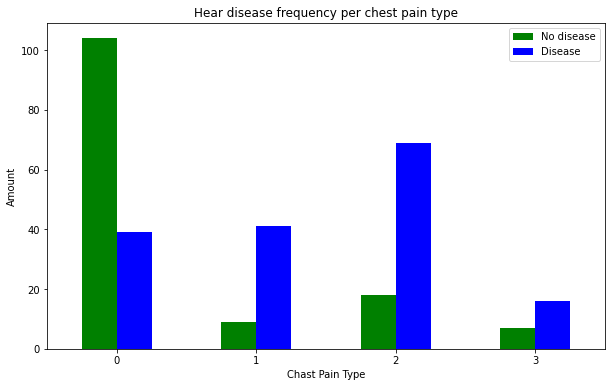

In [58]:
pd.crosstab(data['cp'],data['target']).plot(kind = 'bar',
                                            figsize = (10,6),
                                            color = ['green','blue'])

plt.title('Hear disease frequency per chest pain type')
plt.xlabel('Chast Pain Type')
plt.ylabel('Amount')
plt.legend(['No disease','Disease'])
plt.xticks(rotation = 0)

In [59]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


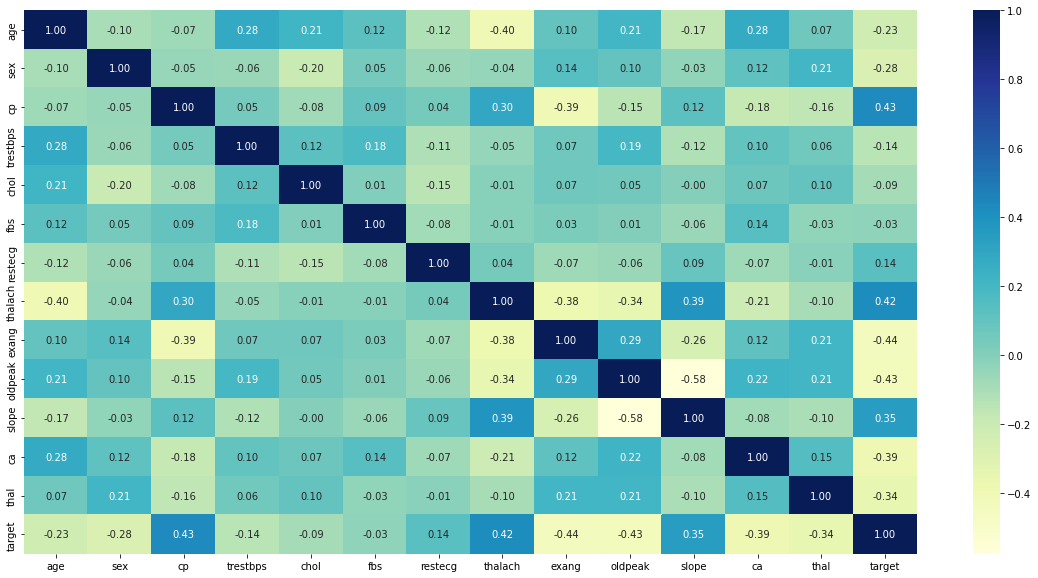

In [64]:
corr_matrix = data.corr()

fig,axs = plt.subplots(1,figsize = (20,10))
axs = sns.heatmap(corr_matrix,
                  annot = True,
                  #linewidth = 0.5,
                  fmt='.2f',
                  cmap = plt.cm.YlGnBu)

In [66]:
X = data.drop(['target'], axis = 1)
y = data['target']

In [69]:
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.2)

In [70]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [71]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [72]:
models = {
    'lr':LogisticRegression(),
    'knn':KNeighborsClassifier(),
    'rfc':RandomForestClassifier()
}

In [77]:
def fit_and_score(models,
                  X_train,
                  X_test,
                  y_train,
                  y_test):
  """

  Fits and evaluates given machine learning models.

  Args:

    models: a dictionary of different sklearn machine learning models
    X_train: training data set
    X_test: testing data set
    y_train: training labels
    y_test: testing labels

  Returns:

    A dictionary of model names and coresponing scores from evaluation phase

  """

  np.random.seed(42)

  model_scores = {}

  for name, model in models.items():
    model.fit(X_train,y_train)
    model_scores[name] = model.score(X_test,y_test)

  return model_scores

In [78]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
model_scores

{'lr': 0.8852459016393442,
 'knn': 0.6885245901639344,
 'rfc': 0.8360655737704918}

In [81]:
model_scores = pd.DataFrame(model_scores, index = ['accuracy'])

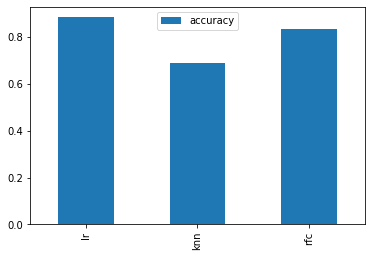

In [84]:
model_scores.T.plot(kind = 'bar')

In [91]:
# Tuning nearest neighbors model

train_scores = []
test_scores = []

n_neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in n_neighbors:
  knn.set_params(n_neighbors = i)
  knn.fit(X_train,y_train)
  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))


Maxium score on the training set = 0.75%


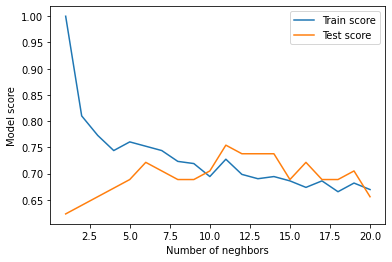

In [93]:
plt.plot(n_neighbors,train_scores, label = 'Train score')
plt.plot(n_neighbors,test_scores, label = 'Test score')

plt.xlabel('Number of neghbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maxium score on the training set = {max(test_scores):.2f}%')

In [113]:
# Tuning logistics regression and random forest classifier models

lr_grid = {
    'C':np.logspace(-4,4,20),
    'solver':['liblinear']
}

rf_grid = {
    'n_estimators':np.arange(10,1000,50),
    'max_depth':[None,3,5,10],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf': np.arange(1,20,2)
}


In [109]:
np.random.seed(42)

lr_rcv = RandomizedSearchCV(LogisticRegression(),
                            param_distributions = lr_grid,
                            cv = 5,
                            n_iter = 20,
                            verbose = True)

lr_rcv.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [110]:
lr_rcv.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [111]:
lr_rcv.score(X_test,y_test)

0.8852459016393442

In [116]:
np.random.seed(42)

rf_rcv = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions = rf_grid,
                            cv = 5,
                            n_iter = 20,
                            verbose = True)

rf_rcv.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [117]:
rf_rcv.score(X_test,y_test)

0.8688524590163934

In [147]:
# Further tuning of LogisticRegrestion model, this time using Grid Search


lr_grid = {
    'penalty':['l1','l2','elasticnet'],
    'C':np.logspace(-4,4,30),
    'solver':['liblinear']
}


np.random.seed(42)

lr_gcv = GridSearchCV(LogisticRegression(),
                      param_grid= lr_grid,
                      cv = 5,
                      verbose = False)

lr_gcv.fit(X_train,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 457, in _check_solver
    raise ValueError(
ValueError: Only 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear']},
             verbose=False)

In [148]:
lr_gcv.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [149]:
lr_gcv.score(X_test,y_test)

0.8852459016393442